# Practica 3
## Arquitecturas y aplicaciones
### Ejercicio 1.1 Regresion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def bias_add(V):
    bias = -np.ones( (len(V),1) )
    return np.concatenate( (V,bias), axis=1)

def bias_sub(V):
    return V[:,:-1] # Saco la ultima columna

In [2]:
def activation(X): 
    
    Y = [] # L capas Y_o, Y_1, Y_2, .... Y_l-1
    i = 0
    P = len(X)
    for s in S: # S variable global con los sizes de las capas 
        if i == len(S)-1:
            Y.append( np.zeros((P,s)) )
            i += 1
        else:
            Y.append( np.zeros((P,s+1)) )
            i += 1
        
    Y[0][:] = bias_add(X)
    
    for k in range(1,len(S)-1):
        Y[k][:] = bias_add( np.tanh( np.dot(Y[k-1],W[k]) ) ) # W global (se arman a parte)
        
    Y[-1][:] = np.tanh( np.dot(Y[-2],W[-1]) )
    return Y  

In [3]:
def correction(Y,Z):
    delta_W = [0] # primer elemento vacio
    
    for i in range(1,len(S)): # S variable global con los sizes de las capas 
        delta_W.append( np.zeros( (S[i-1]+1,S[i]) ) )
        
    L = len(S) 
    E = [0]*L # size L 
    D = [0]*L # size L
    d = [0]*L # size L
    
    E[L-1] =  Z - Y[-1]  
    d[L-1] = 1 - Y[-1]**2
    D[L-1] = E[-1]*d[-1] 
        
    for k in reversed(np.arange(1,L)):
        delta_W[k] = lr * np.dot( Y[k-1].T, D[k]) # lr = learning rate (variable global)
        E[k] = np.dot( D[k], W[k].T )
        d[k] = ( 1 - Y[k-1]**2 )
        D[k-1] = ( bias_sub( E[k]*d[k] ) )
    return delta_W

In [4]:
def adaptation(W,delta_W):
  L = len(S) # S Variable global
  for k in range(1,L-1):
    W[k] += delta_W[k]
  return W

In [5]:
def estimation(Z,Y):
  est = np.mean( np.square(Z - Y) )
  return est

In [7]:
datos1 = pd.read_csv('p13_data/p13_ej1_regress.csv', header = None ) # Ultima columna son los datos objetivo. Los otros de entrada

In [8]:
datos1.head()

,0,1,2
0,2.068351,-2.373603,0.243969
1,1.199141,2.261119,0.107950
2,2.743351,2.670040,0.104728
3,-0.928589,-1.712618,-0.097826
4,-1.995049,0.218964,-0.639999


In [26]:
X = np.concatenate( ( np.array(datos1[0]).reshape(-1,1), np.array(datos1[0]).reshape(-1,1) ), axis =1 )
Z = np.array(datos1[2]).reshape(-1,1)

print(X.shape)
print(Z.shape)

(5000, 2)
(5000, 1)


In [109]:
def train(X, Z, S, W, lr, eps, epoch):
 
  error = 1
  iter = 0
  errores = []
  P = len(X)
  while error > eps and iter < epoch:
        
        Y = activation(X)
        delta_w = correction(Y,Z)
        W = adaptation(W,delta_w)
        error = estimation(Z,Y[-1])
        errores.append(error)
        iter += 1

  return errores

In [110]:
def train_stochastic(X, Z, S, W, lr, eps, epoch):
    
  error = 1
  iter = 0
  errores = []
  P = len(X)
  while error > eps and iter < epoch:
    e = 0
    stochastic = np.random.permutation(P)
    for h in stochastic:
        Xh = X[h:h+1]
        Zh = Z[h:h+1]

        Y = activation(Xh)
        delta_w = correction(Y,Zh)
        W = adaptation(W,delta_w)
        e += np.sum( np.square( Z - Y[-1] ))
        
    error = e/P
    errores.append(error)
    iter += 1

  return errores

Ultimo error:  0.11543588468778648


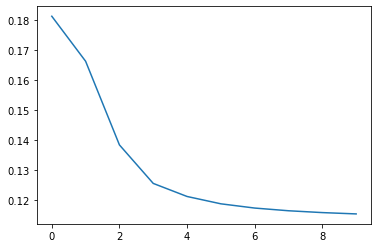

In [108]:
# Defino S y W, variables globales que se usan en las funciones
# Los elementos del medio de S representan las dimensiones (columnas) de la capa oculta

S = [len(X[0]),4,7,len(Z[0])] # [2,1,1]
W = [0]
lr = 0.01

np.random.seed(10)
for i in range(0,len(S)-1):
  w_i = np.random.normal( 0, 0.1, (S[i]+1,S[i+1]) )
  W.append(w_i)

errs = train(X, Z, S, W, lr, 1e-3, 10)
print('Ultimo error: ',errs[-1])
plt.plot(errs)
plt.show()

Ultimo error:  1101.762082541669


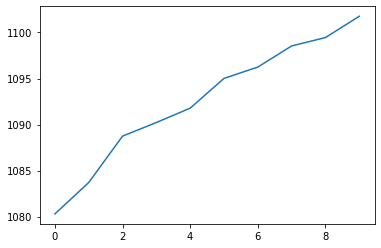

In [105]:
errs_stochastic = train_stochastic(X, Z, S, W, lr, 1e-3, 10)
print('Ultimo error: ',errs_stochastic[-1])
plt.plot(errs_stochastic)
plt.show()